<a href="https://colab.research.google.com/github/L0cked1N/Heat_Transfer/blob/main/Humidifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving E01.csv to E01 (1).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
filename = next(iter(uploaded))  # Get the uploaded filename
data = pd.read_csv(filename)  # Load the CSV file into a DataFrame
# Step 1: Feature Engineering
# Lag Features - create previous 1-hour lag features for temperature and humidity
data['Temperature_Lag1'] = data['Temperature'].shift(1)
data['Humidity_Lag1'] = data['RelativeHumidity'].shift(1)

# Moving Averages - create a 3-hour moving average for temperature and humidity
data['Temperature_MA3'] = data['Temperature'].rolling(window=3).mean()
data['Humidity_MA3'] = data['RelativeHumidity'].rolling(window=3).mean()

# Day of the week - capture daily patterns
data['Day_of_Week'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M').dt.dayofweek

# Step 2: Define the target variable (humidifier on when humidity is less than 40%)
humidity_threshold = 40
data['humidifier_on'] = np.where(data['RelativeHumidity'] < humidity_threshold, 1, 0)

# Drop rows with NaN values due to shifting and rolling mean operations
data = data.dropna()

# Step 3: Prepare the data for regression
X = data[['Temperature', 'RelativeHumidity', 'Temperature_Lag1', 'Humidity_Lag1', 'Temperature_MA3', 'Humidity_MA3', 'Day_of_Week']]
y = data['humidifier_on']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = model.predict(X_test)

# Evaluate model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.053583120740916125


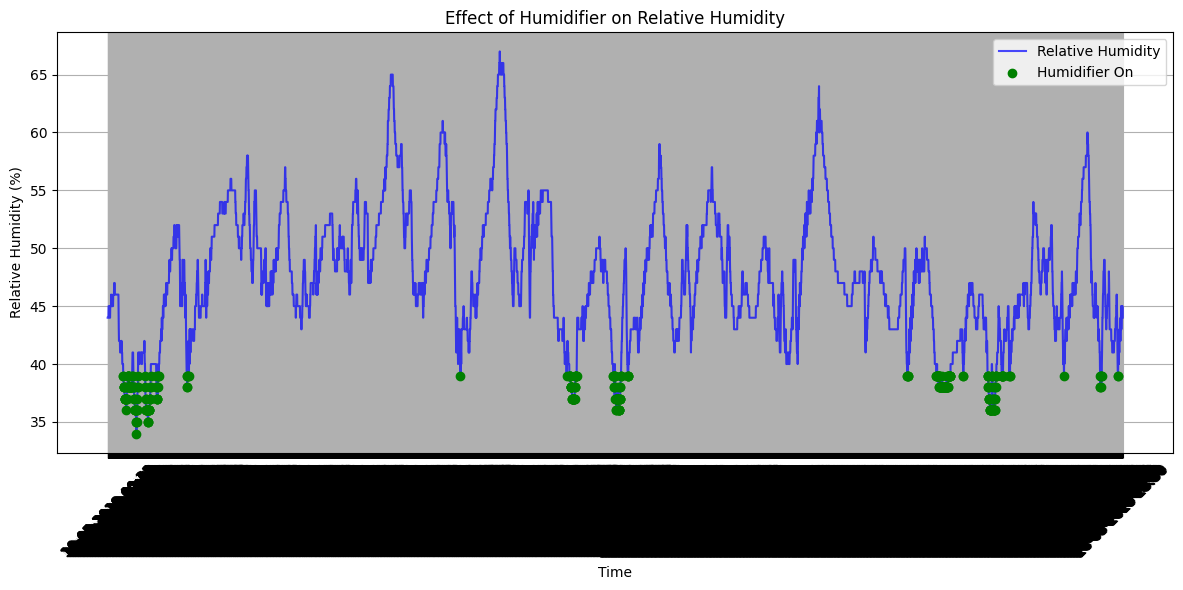

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Assuming you already have the model trained as per the earlier code

# Step 2: Add a column to indicate when the humidifier is on
# (already created in the previous steps, `humidifier_on` column)

# Step 3: Visualize the change in humidity when the humidifier is turned on

plt.figure(figsize=(12, 6))

# Plot Humidity over time
plt.plot(data['datetime'], data['RelativeHumidity'], label='Relative Humidity', color='blue', alpha=0.7)

# Mark the points where the humidifier is on (use green for this)
plt.scatter(data['datetime'][data['humidifier_on'] == 1],
            data['RelativeHumidity'][data['humidifier_on'] == 1],
            color='green',
            label='Humidifier On',
            zorder=5)

# Add labels and title
plt.title('Effect of Humidifier on Relative Humidity')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


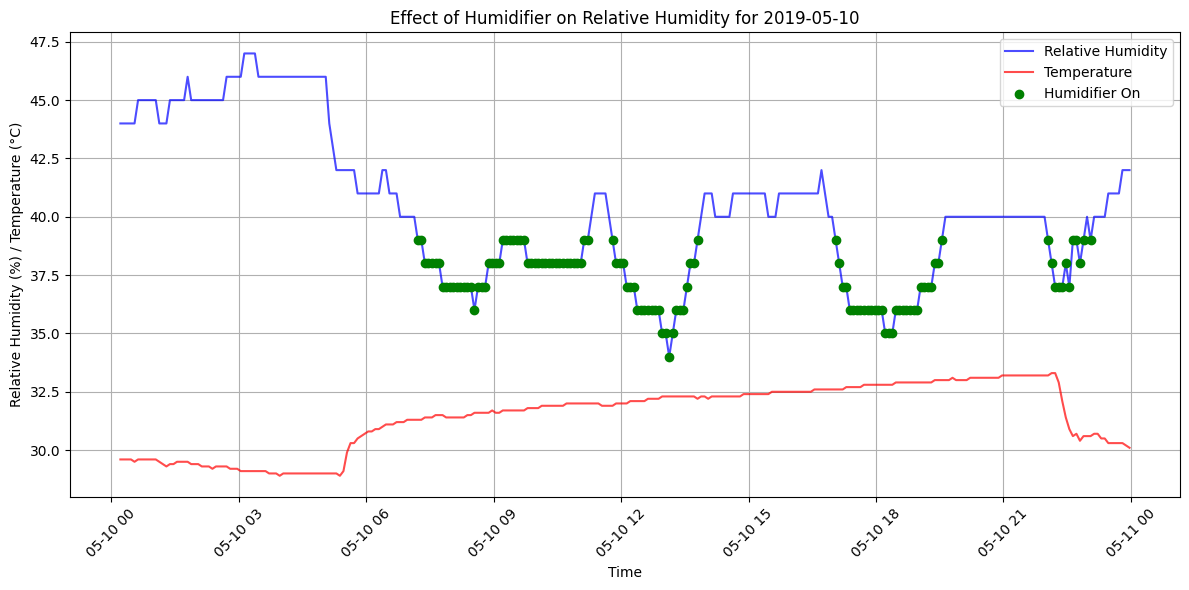

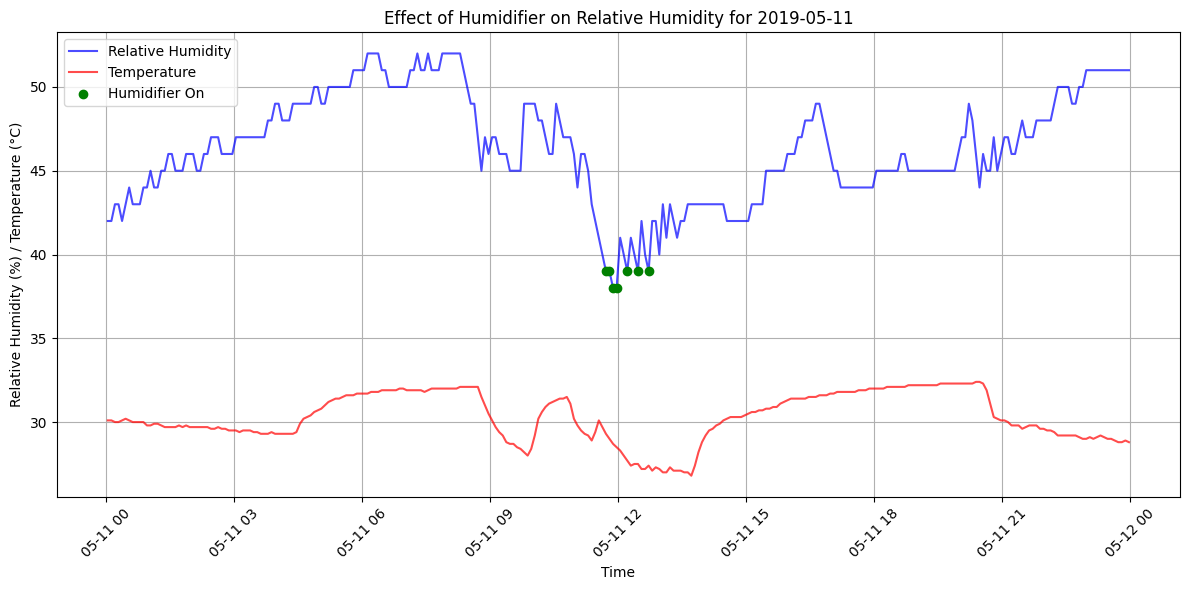

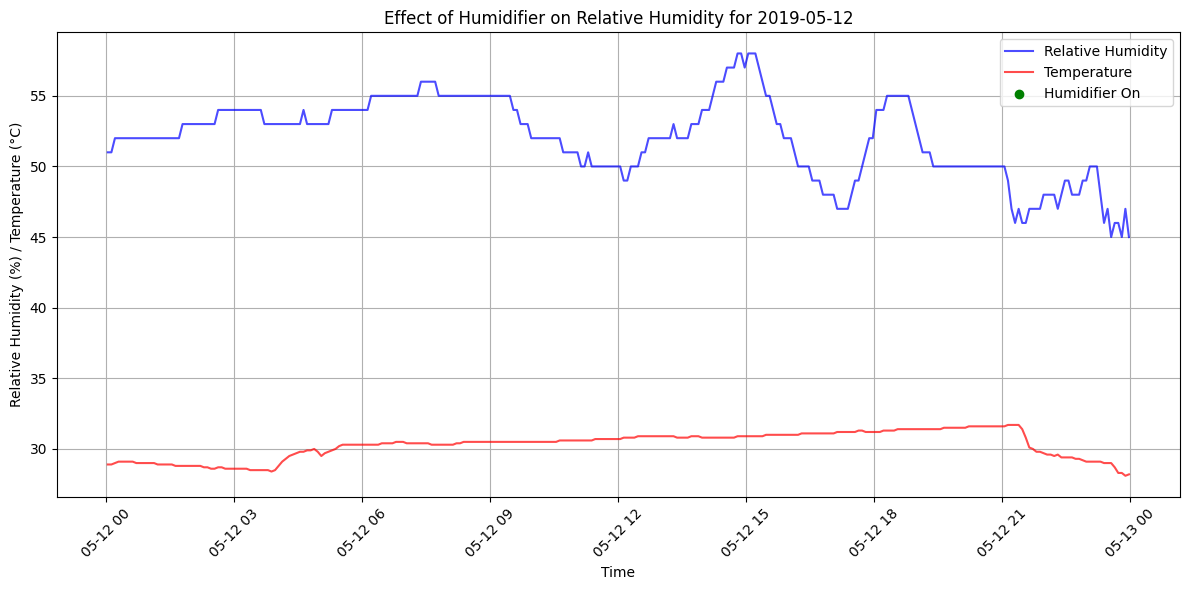

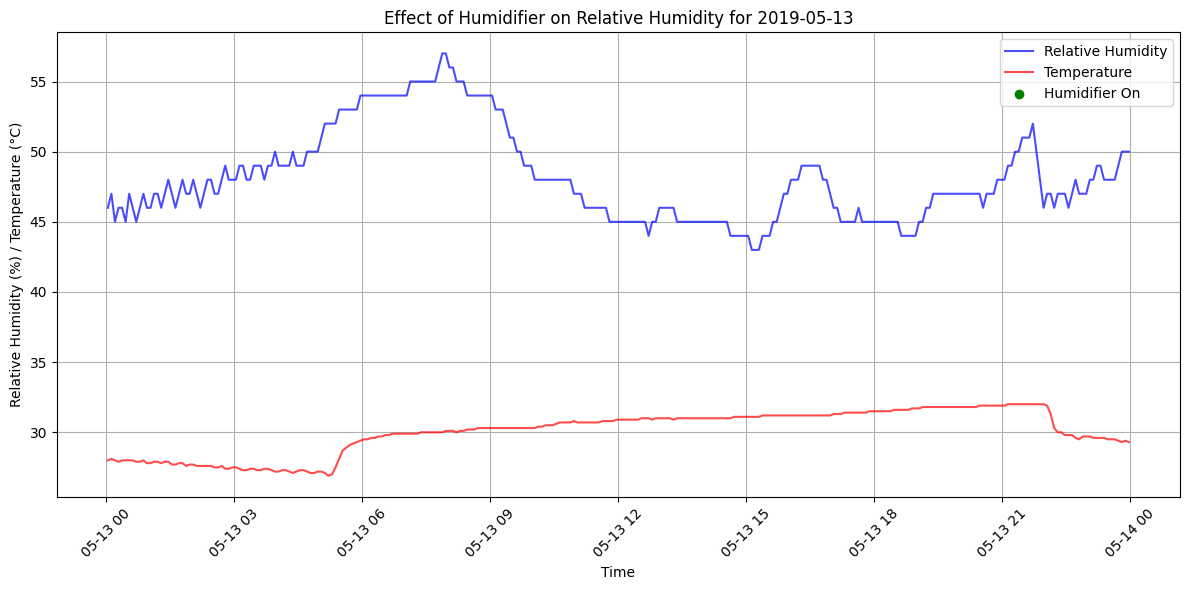

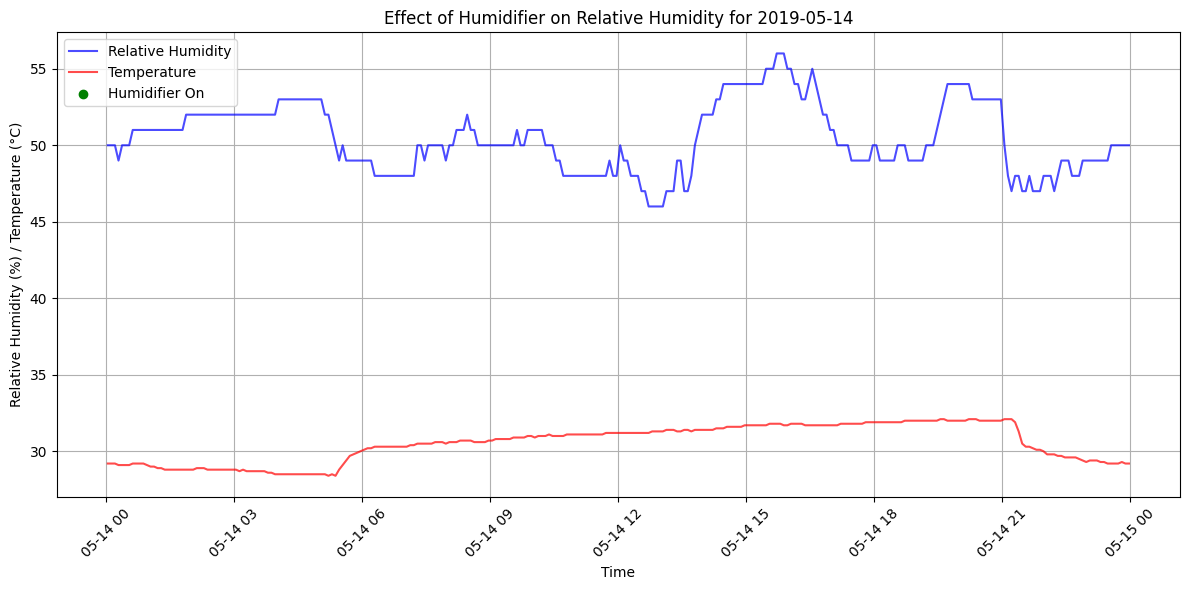

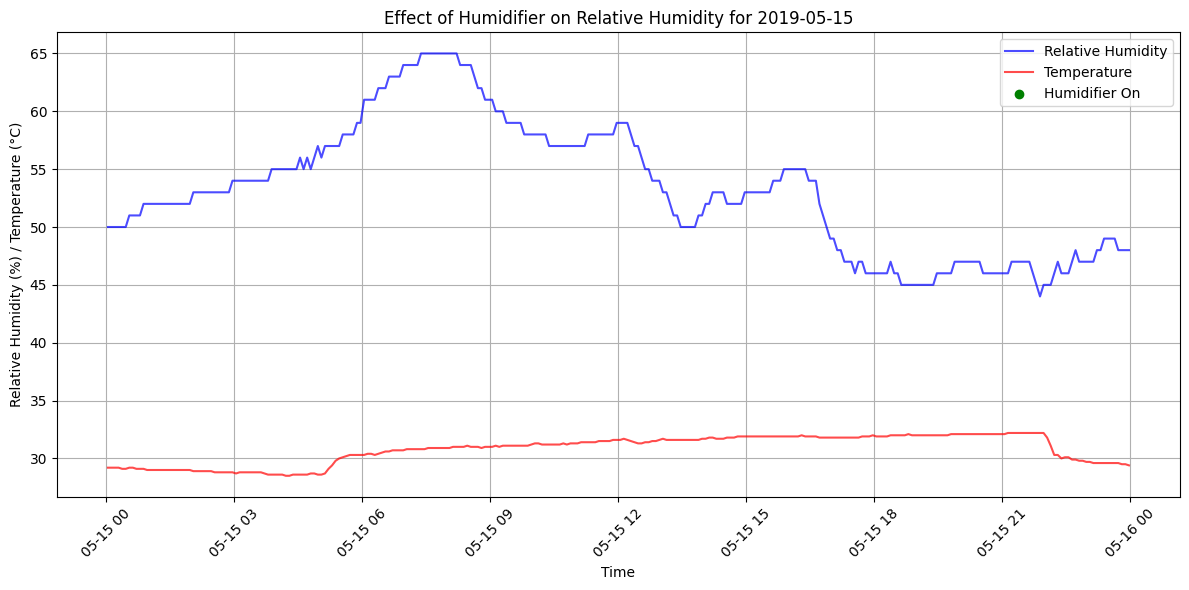

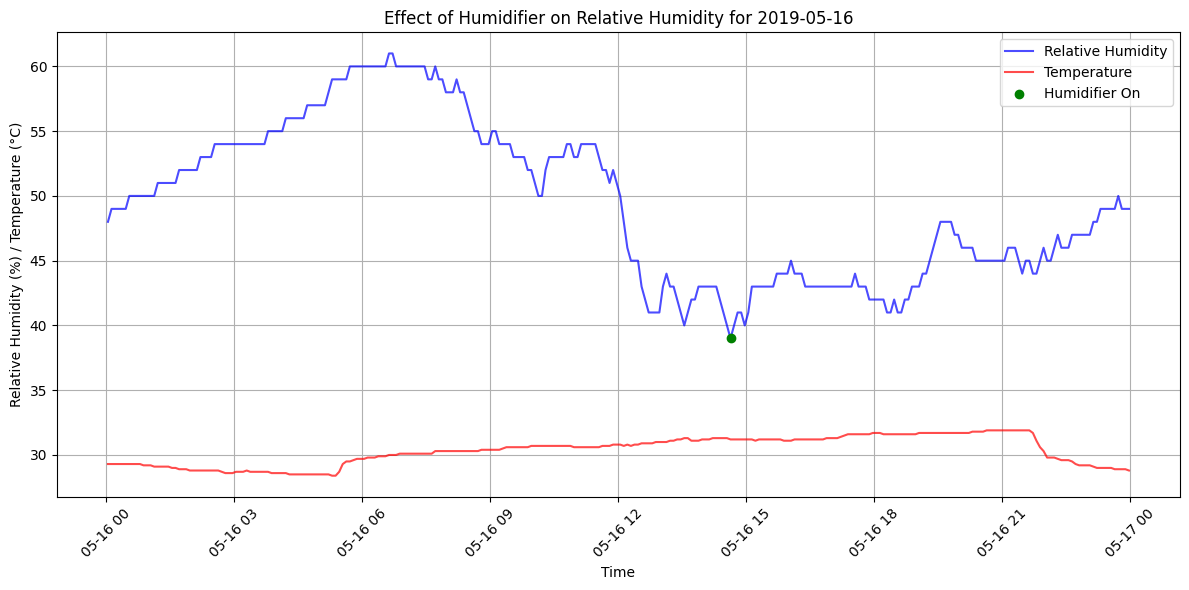

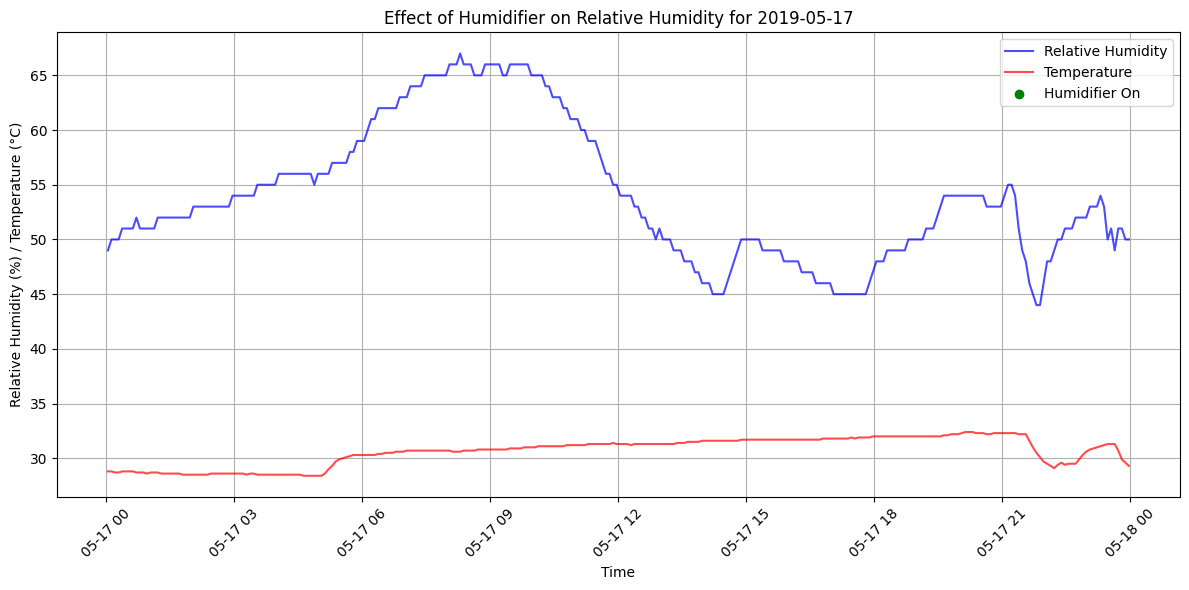

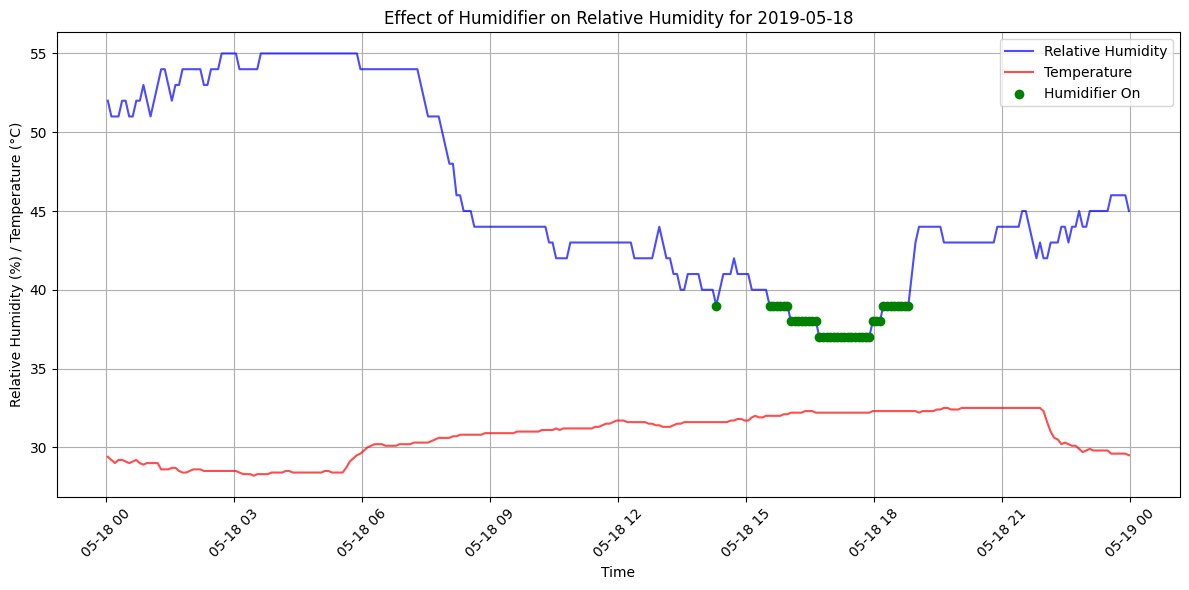

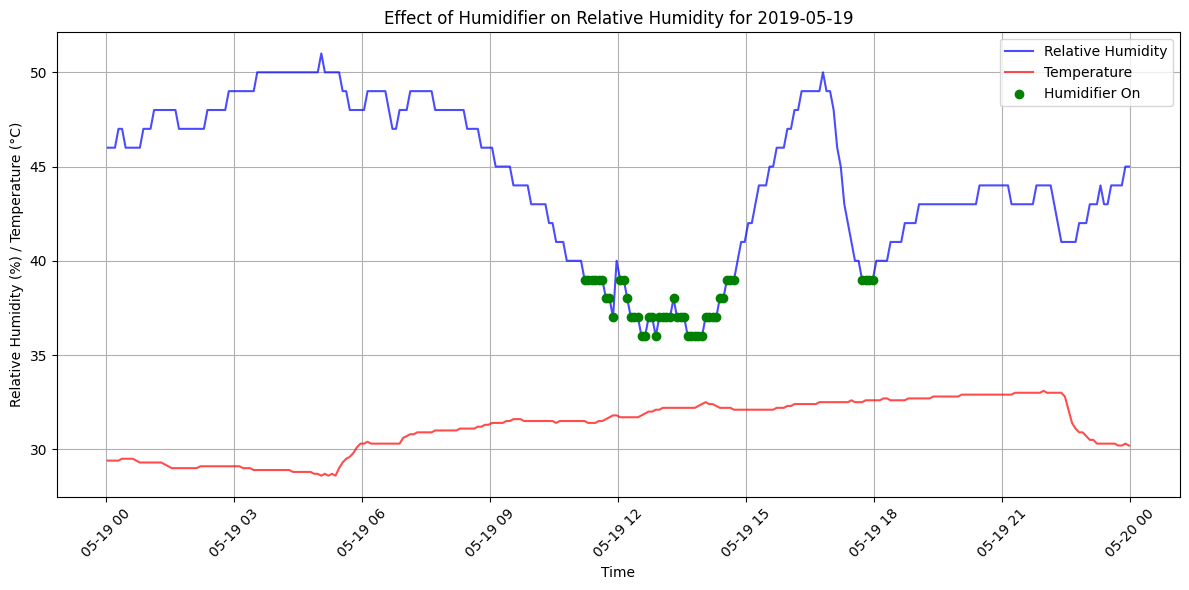

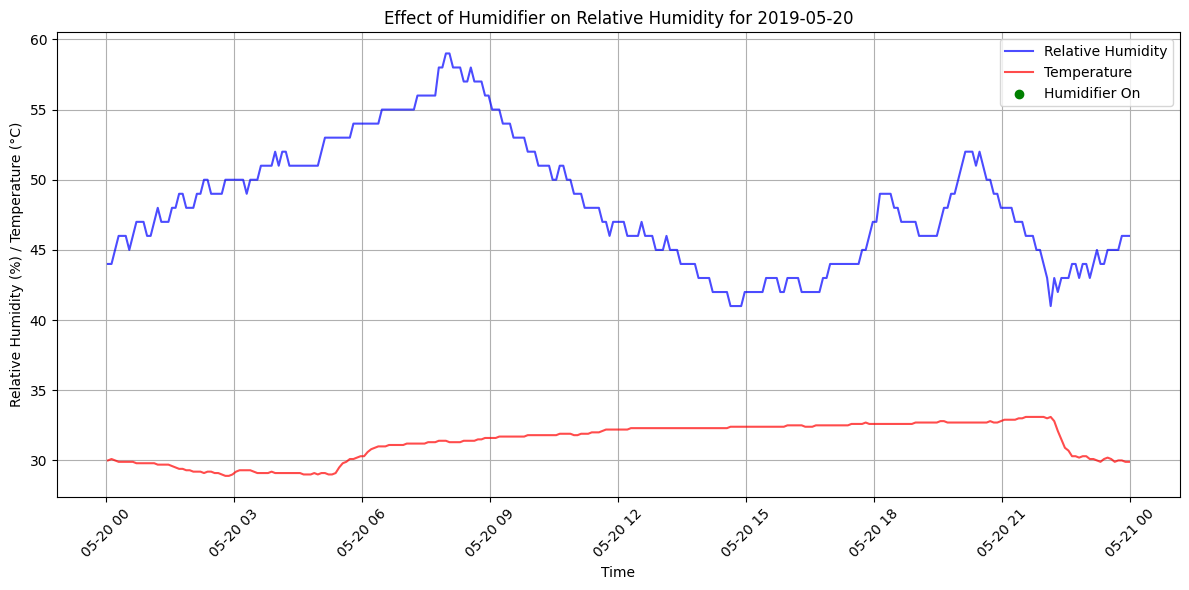

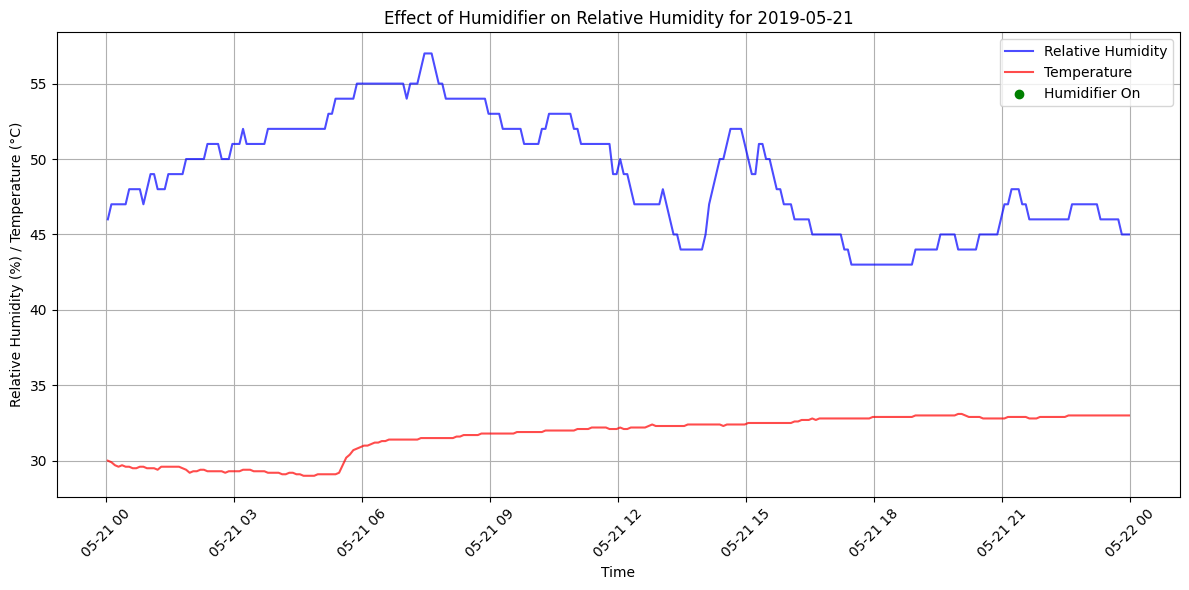

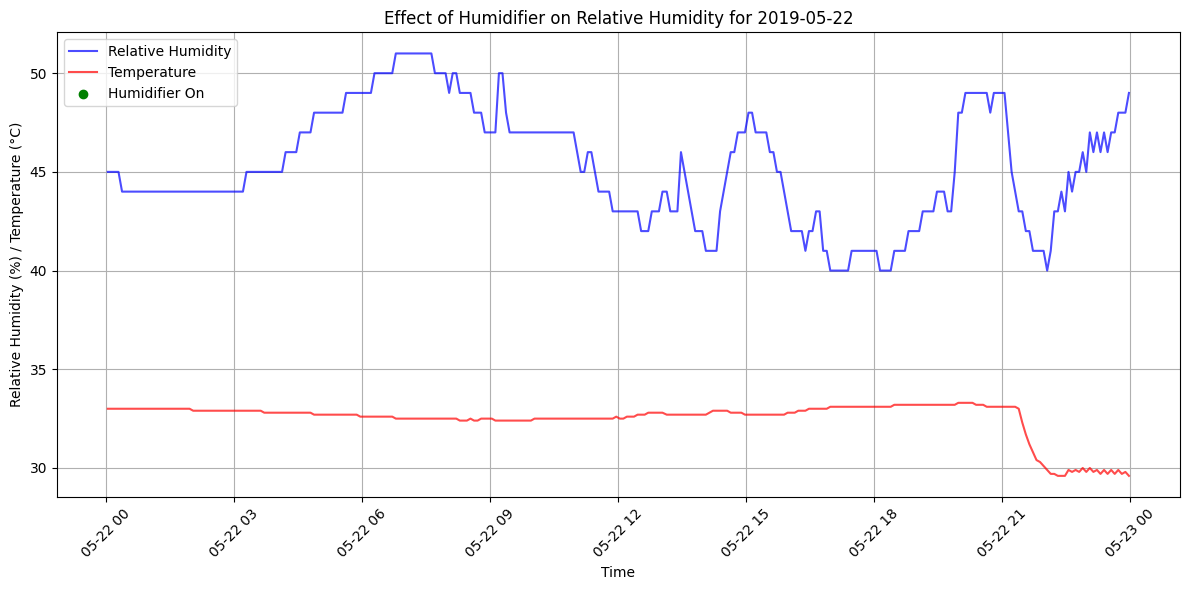

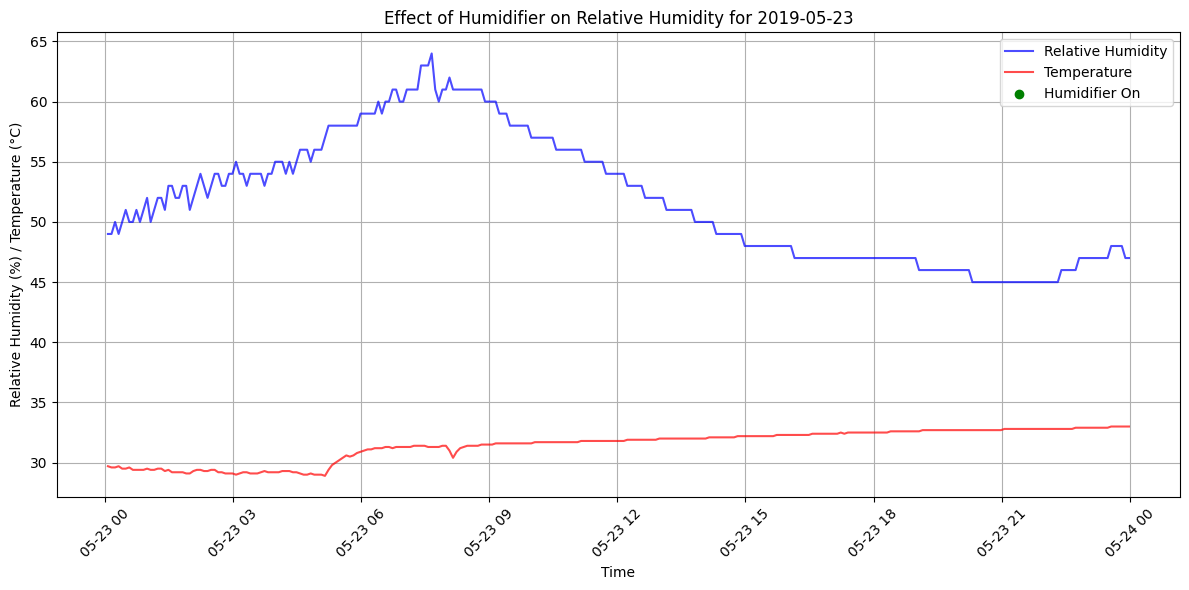

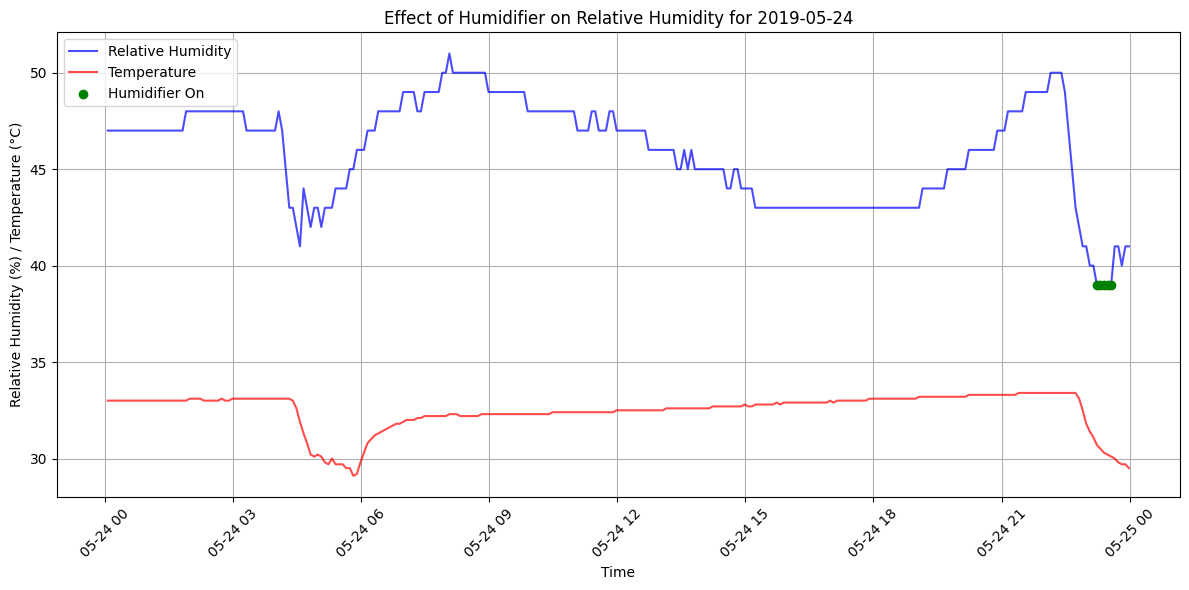

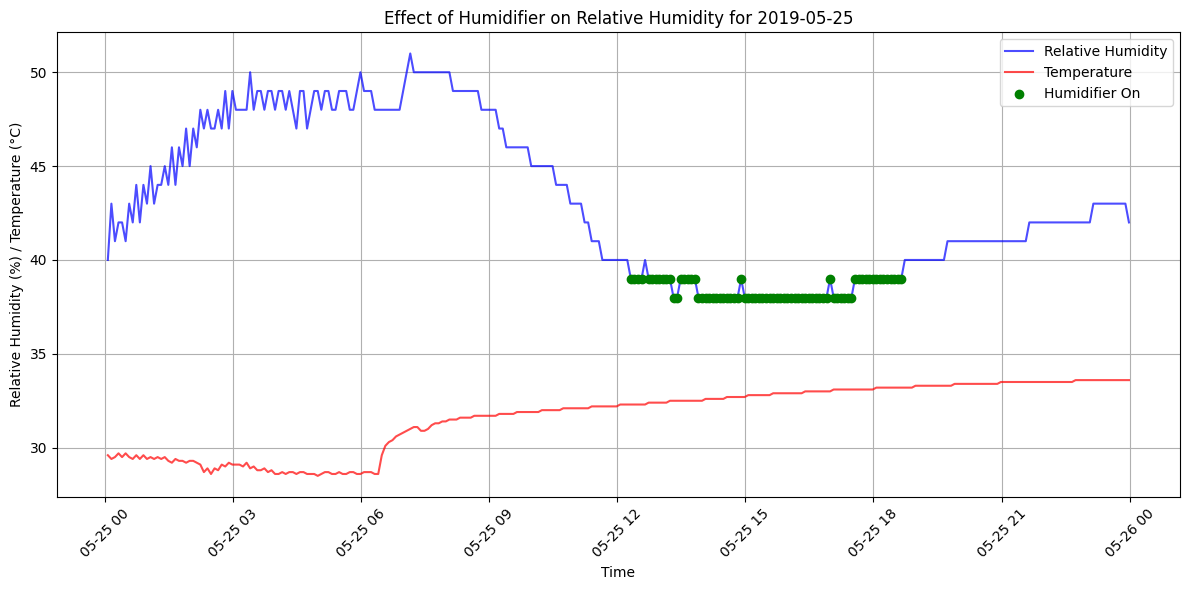

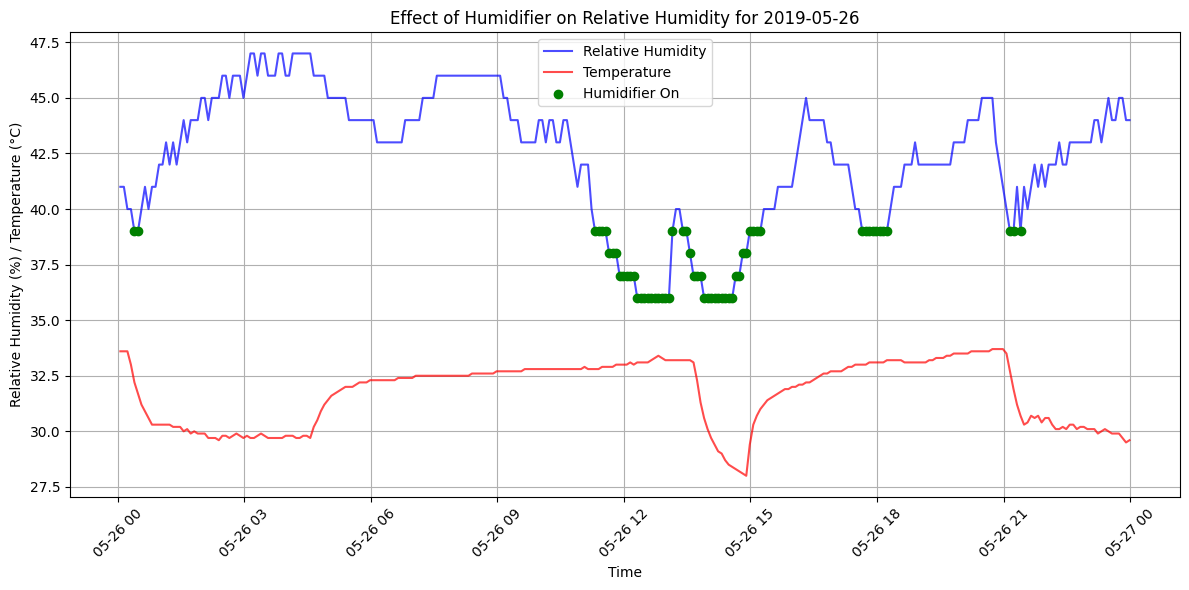

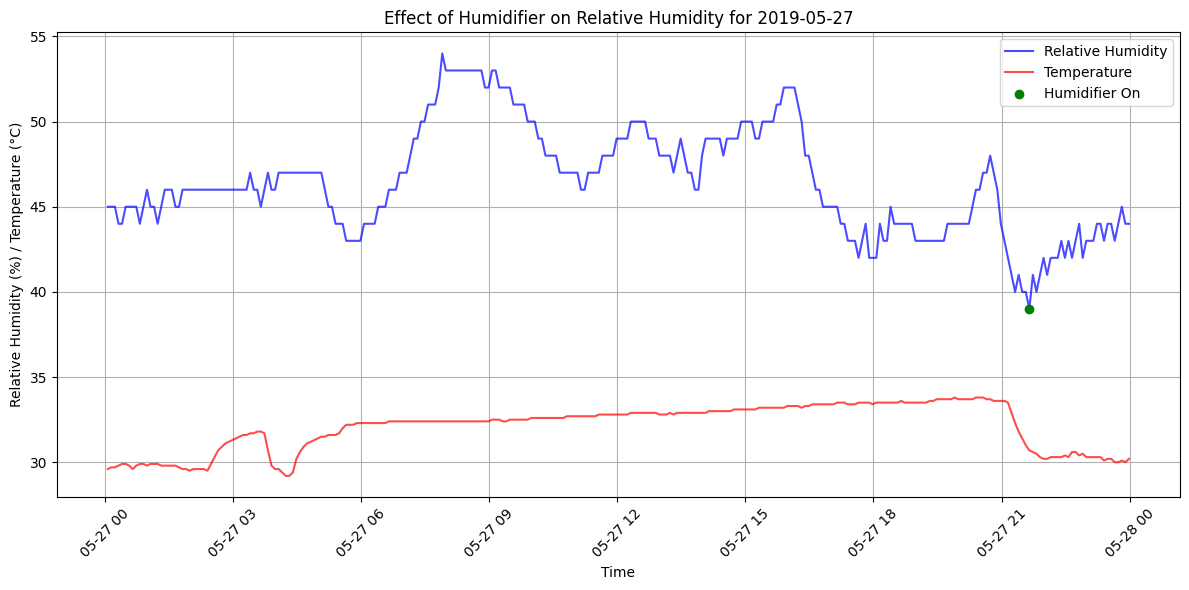

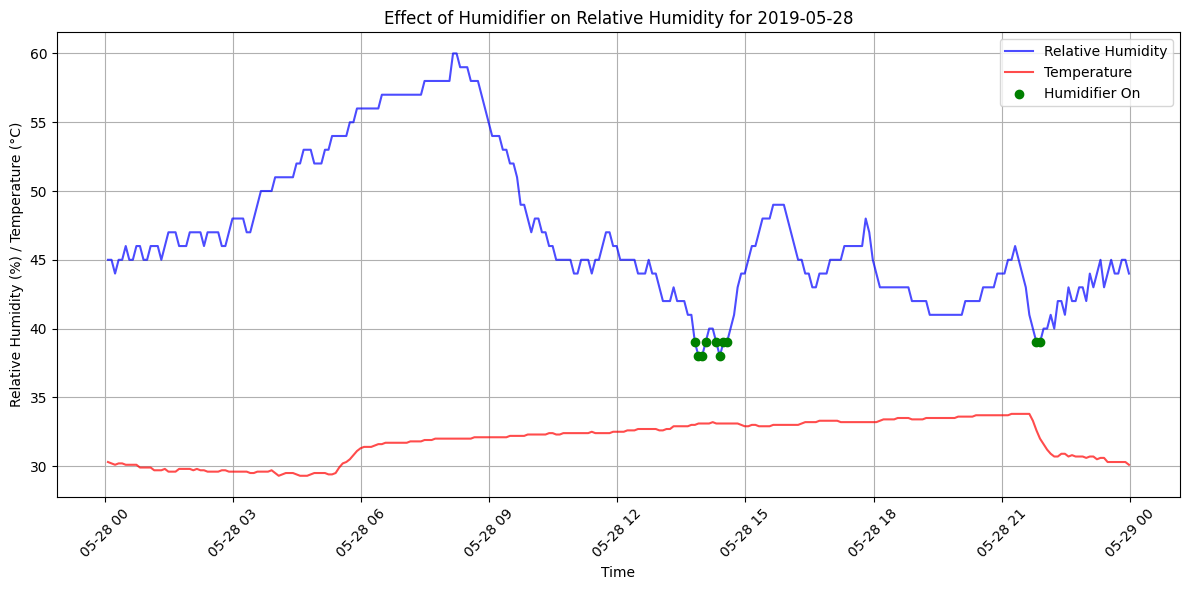

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Assuming the data is already loaded as `data` and 'datetime' is properly parsed

# Step 2: Convert the datetime column to pandas datetime format if not already done
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y %H:%M')

# Step 3: Group the data by date (extracting the date part from datetime)
data['date'] = data['datetime'].dt.date

# Step 4: Loop through each day and create a separate plot
unique_dates = data['date'].unique()

for date in unique_dates:
    # Filter data for the specific day
    daily_data = data[data['date'] == date]

    # Plot the humidity and temperature for that day
    plt.figure(figsize=(12, 6))

    # Plot Humidity over time for that day
    plt.plot(daily_data['datetime'], daily_data['RelativeHumidity'], label='Relative Humidity', color='blue', alpha=0.7)

    # Plot Temperature over time for that day
    plt.plot(daily_data['datetime'], daily_data['Temperature'], label='Temperature', color='red', alpha=0.7)

    # Mark the points where the humidifier is turned on
    plt.scatter(daily_data['datetime'][daily_data['humidifier_on'] == 1],
                daily_data['RelativeHumidity'][daily_data['humidifier_on'] == 1],
                color='green',
                label='Humidifier On',
                zorder=5)

    # Add labels, title, and legend
    plt.title(f'Effect of Humidifier on Relative Humidity for {date}')
    plt.xlabel('Time')
    plt.ylabel('Relative Humidity (%) / Temperature (°C)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()
